# Часть I - ML

In [1]:
import os

import catboost
import pandas as pd
import shap

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
DATA_PATH = os.path.join('..', 'data', 'processed', 'train_data.csv')

RANDOM_STATE = 42

In [3]:
data = pd.read_csv(DATA_PATH, index_col='id_a')
data['target'] = data['target'].replace({
    0.: 'не спам',
    1.: 'небольшие полезные ИП / малые бизнесы',
    2.: 'организации',
    3.: 'мобильная карусель',
    4.: 'чёрные спаммеры и мошенники',
}).astype('category')
data.head()

,dst_nunique,diff_mean,diff_std,time_zone_nunique,calls_count,duration_mean,duration_std,forward_nunique,forward_mean,zero_call_flg_nunique,zero_call_flg_mean,source_b_nunique,source_b_mean,source_f_nunique,source_f_mean,num_b_length_mean,num_b_length_std,target
id_a,,,,,,,,,,,,,,,,,,
1872,16,44007.566667,33942.428929,1,31,47.483871,58.122211,2,0.064516,2,1.774194,1,1.000000,1,0.000000,10.000000,0.000000,не спам
3858,93,42434.618644,31787.404854,2,119,22.957983,55.940100,2,0.008403,3,0.260504,2,0.008403,1,1.000000,10.033613,0.258181,чёрные спаммеры и мошенники
4357,36,44738.702703,35497.548981,5,38,90.947368,154.598512,2,0.078947,3,3.052632,2,0.473684,2,0.552632,10.000000,0.000000,организации
7294,9,41028.541353,36180.366491,3,134,4.977612,20.676334,2,0.380597,2,4.962687,2,0.500000,2,0.507463,10.000000,0.000000,не спам
9102,6,48611.000000,30154.852093,2,10,0.000000,0.000000,2,0.200000,1,5.000000,2,0.400000,2,0.800000,10.000000,0.000000,чёрные спаммеры и мошенники


In [4]:
X_train = data.drop(columns='target')
y_train = data['target']

## CatBoost

In [5]:
classifier = catboost.CatBoostClassifier(
    verbose=False,
    random_state=RANDOM_STATE,
)

scores = cross_val_score(
    estimator=classifier,
    X=X_train,
    y=y_train,
    scoring=make_scorer(fbeta_score, average='macro', beta=0.5),
    cv=5,
    n_jobs=-1,
)
scores.mean()

0.6274233777977564

In [6]:
classifier.fit(X_train, y_train)

In [7]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_train)

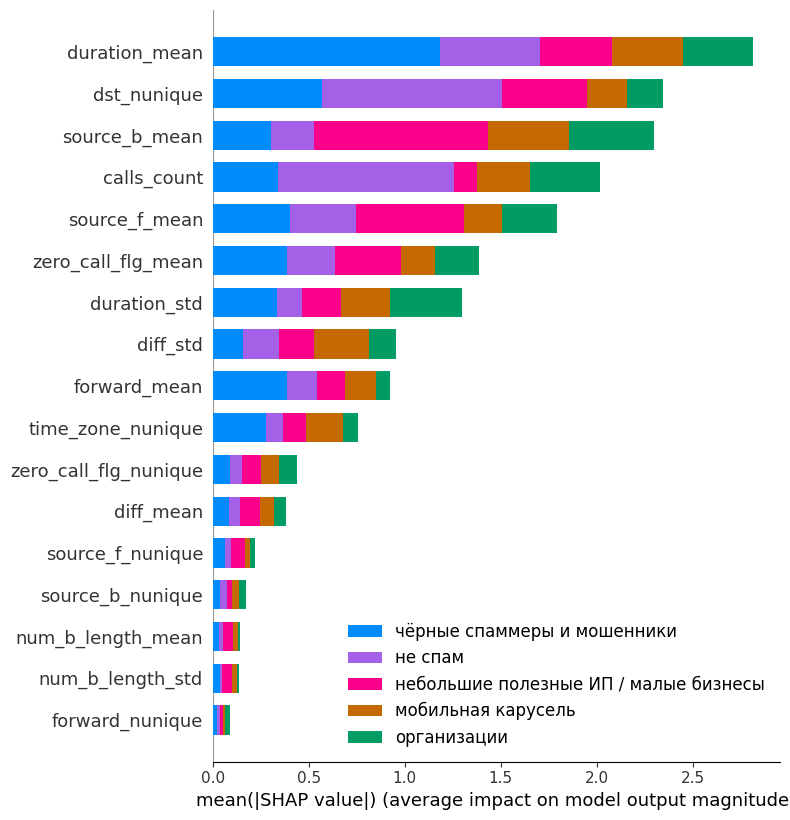

In [8]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_train,
    class_names=classifier.classes_,
    # max_display=33,
)